# Data Analytics fo House Pricing Dataset

In [21]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [24]:
!pip install -U scikit-learn

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 2.2 MB/s eta 0:00:05
    --------------------------------------- 0.2/11.0 MB 2.1 MB/s eta 0:00:06
    --------------------------------------- 0.3/11.0 MB 1.8 MB/s eta 0:00:06
   - -------------------------------------- 0.4/11.0 MB 1.9 MB/s eta 0:00:06
   - -------------------------------------- 0.5/11.0 MB 2.0 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/11.0 MB 2.0 MB/s eta 0:00:06
   -- ------------------------------------- 0.7/11.0 MB 2.1 MB/s eta 0:00:05
   --- ------------------------------------ 0.9/11.0 MB 2.4 MB/s eta 0:00:05
   --- ------------------------------------ 1.1/11.0 MB 2.6 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.0 MB 2.8 MB/s eta 0:00:04
   ----- ---------------------------------- 1.5/11.0 MB 2.9 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/11.0 MB 2.9 MB/s eta 0:00:04
   ---

In [274]:
filepath='file:C:///Users/utente/Downloads/kc_house_data_NaN.csv'
df = pd.read_csv(filepath, header=None)
print(df.head())

    0           1                2         3         4          5   \
0  NaN          id             date     price  bedrooms  bathrooms   
1  0.0  7129300520  20141013T000000  221900.0       3.0        1.0   
2  1.0  6414100192  20141209T000000  538000.0       3.0       2.25   
3  2.0  5631500400  20150225T000000  180000.0       2.0        1.0   
4  3.0  2487200875  20141209T000000  604000.0       4.0        3.0   

            6         7       8           9   ...     12          13  \
0  sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above   
1         1180      5650     1.0           0  ...      7        1180   
2         2570      7242     2.0           0  ...      7        2170   
3          770     10000     1.0           0  ...      6         770   
4         1960      5000     1.0           0  ...      7        1050   

              14        15            16       17                  18  \
0  sqft_basement  yr_built  yr_renovated  zipcode                 lat   


In [276]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,NaN,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,0.0,7129300520,20141013T000000,221900.0,3.0,1.0,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,1.0,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.721000000000004,-122.319,1690,7639
3,2.0,5631500400,20150225T000000,180000.0,2.0,1.0,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.23299999999999,2720,8062
4,3.0,2487200875,20141209T000000,604000.0,4.0,3.0,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.39299999999999,1360,5000


In [192]:
df = pd.DataFrame({
    'id': [7129300520, 6414100192, 5631500400, 2487200875],
    'Unnamed:0': [20141013, 20141209, 20150225, 20141209],
    'price': [221900.0, 538000.0, 180000.0, 604000.0],
    'bedrooms': [3.0, 30, 2.0, 4.0],
    'bathrooms': [1.0, 2.25, 1.0, 3.0],
    '6': [1180, 2570, 770, 1960],
    '7': [5650, 7242, 10000, 5000],
    '8': [1.0, 2.0, 1.0, 1.0],
    '9': [0, 0, 0, 0],
    '10': [0,0,0,0],
    '11': [3,3,3,5],
    '12': 
})
    
df.rename(columns={
    '1': 'id',
    '2': 'Unnamed:0',
    '3': 'price',
    '4': 'bedrooms',
    '5' : 'bathrooms',
    '6': 'sqft_living',
    '7': 'sqft_lot',
    '8': 'floors',
    '9': 'waterfront',
}, inplace=True)
print(df)

           id  Unnamed:0     price  bedrooms  bathrooms  sqft_living  \
0  7129300520   20141013  221900.0       3.0       1.00         1180   
1  6414100192   20141209  538000.0      30.0       2.25         2570   
2  5631500400   20150225  180000.0       2.0       1.00          770   
3  2487200875   20141209  604000.0       4.0       3.00         1960   

   sqft_lot  floors  waterfront  
0      5650     1.0           0  
1      7242     2.0           0  
2     10000     1.0           0  
3      5000     1.0           0  


In [204]:
df.rename(columns={
    '1': 'id',
    '2': 'Unnamed:0',
    '3': 'price',
    '4': 'bedrooms',
    '5' : 'bathrooms',
    '6': 'sqft_living',
    '7': 'sqft_lot',
    '8': 'floors',
    '9': 'waterfront',
}, inplace=True)
print(df)

            0           1                2         3         4          5   \
0          NaN          id             date     price  bedrooms  bathrooms   
1          0.0  7129300520  20141013T000000  221900.0       3.0        1.0   
2          1.0  6414100192  20141209T000000  538000.0       3.0       2.25   
3          2.0  5631500400  20150225T000000  180000.0       2.0        1.0   
4          3.0  2487200875  20141209T000000  604000.0       4.0        3.0   
...        ...         ...              ...       ...       ...        ...   
21609  21608.0   263000018  20140521T000000  360000.0       3.0        2.5   
21610  21609.0  6600060120  20150223T000000  400000.0       4.0        2.5   
21611  21610.0  1523300141  20140623T000000  402101.0       2.0       0.75   
21612  21611.0   291310100  20150116T000000  400000.0       3.0        2.5   
21613  21612.0  1523300157  20141015T000000  325000.0       2.0       0.75   

                6         7       8           9   ...     12   

In [154]:
df.head()

,id,Unnamed:0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
0,7129300520,20141013,221900.0,3.0,1.00,1180,5650,1.0,0
1,6414100192,20141209,538000.0,30.0,2.25,2570,7242,2.0,0
2,5631500400,20150225,180000.0,2.0,1.00,770,10000,1.0,0
3,2487200875,20141209,604000.0,4.0,3.00,1960,5000,1.0,0


In [280]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv"
df = pd.read_csv(url)

new_column_names = [
    'Unnamed:0','id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
    'grade', 'sqft_above', 'sqft_basement', 'yr_built',
    'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
    'sqft_lot15'
]

df.columns = new_column_names

In [232]:
print (df.head())

   Unnamed:0          id             date     price  bedrooms  bathrooms  \
0          0  7129300520  20141013T000000  221900.0       3.0       1.00   
1          1  6414100192  20141209T000000  538000.0       3.0       2.25   
2          2  5631500400  20150225T000000  180000.0       2.0       1.00   
3          3  2487200875  20141209T000000  604000.0       4.0       3.00   
4          4  1954400510  20150218T000000  510000.0       3.0       2.00   

   sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0         1180      5650     1.0           0  ...      7        1180   
1         2570      7242     2.0           0  ...      7        2170   
2          770     10000     1.0           0  ...      6         770   
3         1960      5000     1.0           0  ...      7        1050   
4         1680      8080     1.0           0  ...      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             

### Question 1

Display the data types of each column using the function dtypes. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.

In [282]:
#Enter Your Code, Execute and take the Screenshot
print(df.dtypes)

Unnamed:0          int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


We use the method describe to obtain a statistical summary of the dataframe.

In [284]:
df.describe()

,Unnamed:0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Module 2: Data Wrangling

Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Make sure the inplace parameter is set to True. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.

In [286]:
#Enter Your Code, Execute and take the Screenshot
df.drop(columns=["id", "Unnamed:0"], axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We can see we have missing values for the columns  bedrooms and  bathrooms 

In [244]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


We can replace the missing values of the column 'bedrooms' with the mean of the column 'bedrooms'  using the method replace(). Don't forget to set the inplace parameter to True

In [246]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

We also replace the missing values of the column 'bathrooms' with the mean of the column 'bathrooms'  using the method replace(). Don't forget to set the  inplace  parameter top  True 

In [250]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [252]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Question 3: Exploratory Data Analysis

Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a data frame. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.

In [296]:
# Enter your code, execute it and take a screenshot
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv"
df = pd.read_csv(url)
floor_counts = df['floors'].value_counts()
floor_counts_df = floor_counts.to_frame()
floor_counts_df.reset_index(inplace=True)
print(floor_counts_df)

   floors  count
0     1.0  10680
1     2.0   8241
2     1.5   1910
3     3.0    613
4     2.5    161
5     3.5      8


### Question 4
Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers. Take a screenshot of your code and boxplot. You will need to submit the screenshot for the final project.

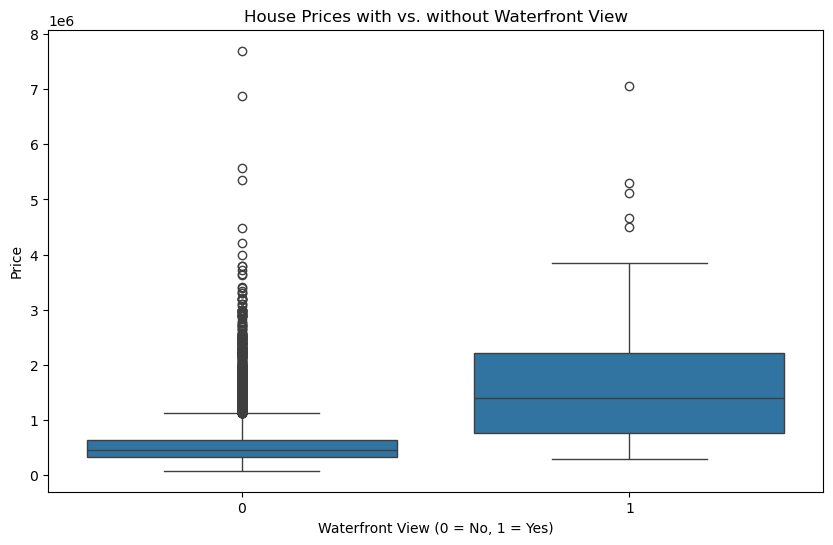

In [288]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('House Prices with vs. without Waterfront View')
plt.xlabel('Waterfront View (0 = No, 1 = Yes)')
plt.ylabel('Price')
plt.show()

# Question 5
Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price. Take a screenshot of your code and scatterplot. You will need to submit the screenshot for the final project.

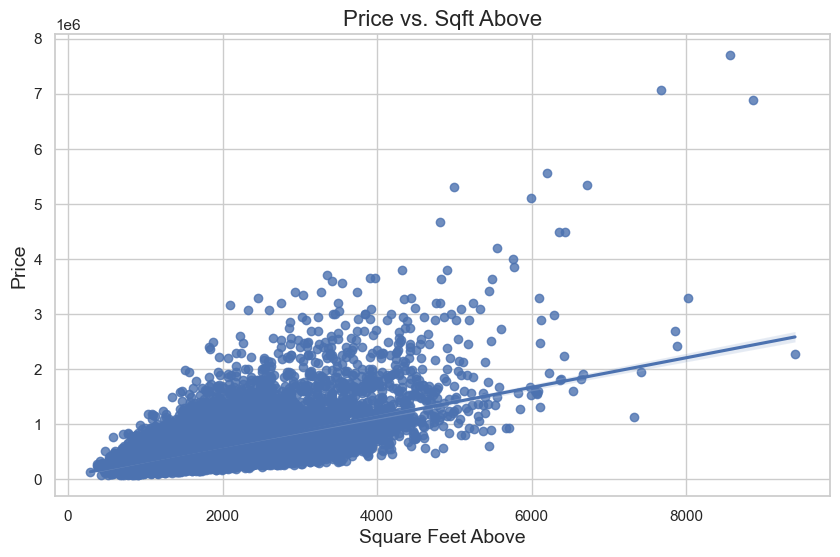

In [299]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv"
df = pd.read_csv(url)
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.regplot(x='sqft_above', y='price', data=df)
plt.title('Price vs. Sqft Above', fontsize=16)
plt.xlabel('Square Feet Above', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

We can use the Pandas method corr() to find the feature other than price that is most correlated with price.

# Module 4: Model Development

We can Fit a linear regression model using the longitude feature 'long' and caculate the R^2.

In [305]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

### Question 6

Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

In [310]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv"
df = pd.read_csv(url)
X = df[['sqft_living']]
y = df['price']          
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R^2 value: {r2:.4f}')

R^2 value: 0.4941


### Question 7
Fit a linear regression model to predict the 'price' using the list of features:

In [ ]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

In [325]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv"
df = pd.read_csv(url)
df_cleaned = df.dropna()
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", 
            "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df_cleaned[features] 
y = df_cleaned['price'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

In [323]:
r2 = r2_score(y_test, y_pred)
print(f'R^2 value: {r2:.4f}')

R^2 value: 0.6571


### This will help with Question 8

Create a list of tuples, the first element in the tuple contains the name of the estimator:

'scale'

'polynomial'

'model'

The second element in the tuple contains the model constructor

StandardScaler()

PolynomialFeatures(include_bias=False)

LinearRegression()

In [329]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

### Question 8

Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

In [348]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv"
df = pd.read_csv(url)
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", 
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]  
y = df['price'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features)
    ],
    remainder='passthrough'
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R^2 value: {r2:.4f}')

R^2 value: 0.6613


# Module 5: Model Evaluation and Refinement
Import the necessary modules:

In [335]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:

In [338]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


### Question 9

Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

In [343]:
from sklearn.linear_model import Ridge
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv"
df = pd.read_csv(url)
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", 
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features)
    ],
    remainder='passthrough'
)
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge(alpha=0.1)) 
])
ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'R^2 value for Ridge Regression: {r2_ridge:.4f}')

R^2 value for Ridge Regression: 0.6614


### Question 10

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2. You will need to submit it for the final project.

In [346]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv"
df = pd.read_csv(url)
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", 
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features)
    ],
    remainder='passthrough'
)
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly_features', PolynomialFeatures(degree=2)),  # Second order polynomial transformation
    ('ridge', Ridge(alpha=0.1))  # Set the regularization parameter to 0.1
])
ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'R^2 value for Ridge Regression with Polynomial Features: {r2_ridge:.4f}')

R^2 value for Ridge Regression with Polynomial Features: 0.7001
